In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 137.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="zVTcvgXZEjc4ds2sz2eS")
project = rf.workspace("charusat-7vcto").project("facemaskdetection1")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FaceMaskDetection1-1 in yolov5pytorch:: 100%|██████████| 1708/1708 [00:00<00:00, 2446.42it/s]


In [4]:
!nvidia-smi

Fri Jan 16 12:37:26 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.6 MB/s eta 0:00:00


In [6]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:
!yolo task=detect mode=train model=yolov8n.pt conf=0.25 data=//content//FaceMaskDetection1-1//data.yaml epochs=25 imgsz=640

Ultralytics 8.4.3 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=0.25, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=//content//FaceMaskDetection1-1//data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0

In [11]:
!pip install cvzone

  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26298 sha256=325cc159aaa21b291d22dfd80957cdcb0bb36268d3d8b0d1ef333bfa15c380e8
  Stored in directory: /root/.cache/pip/wheels/5d/21/e8/3147ae88d44e27f06e0175d337a7673c70fb957202cbbe2034
Successfully built cvzone


In [12]:
import cv2
import cvzone
import math

In [13]:
classNames=['mask_weared_incorrect','with_mask','without_mask']

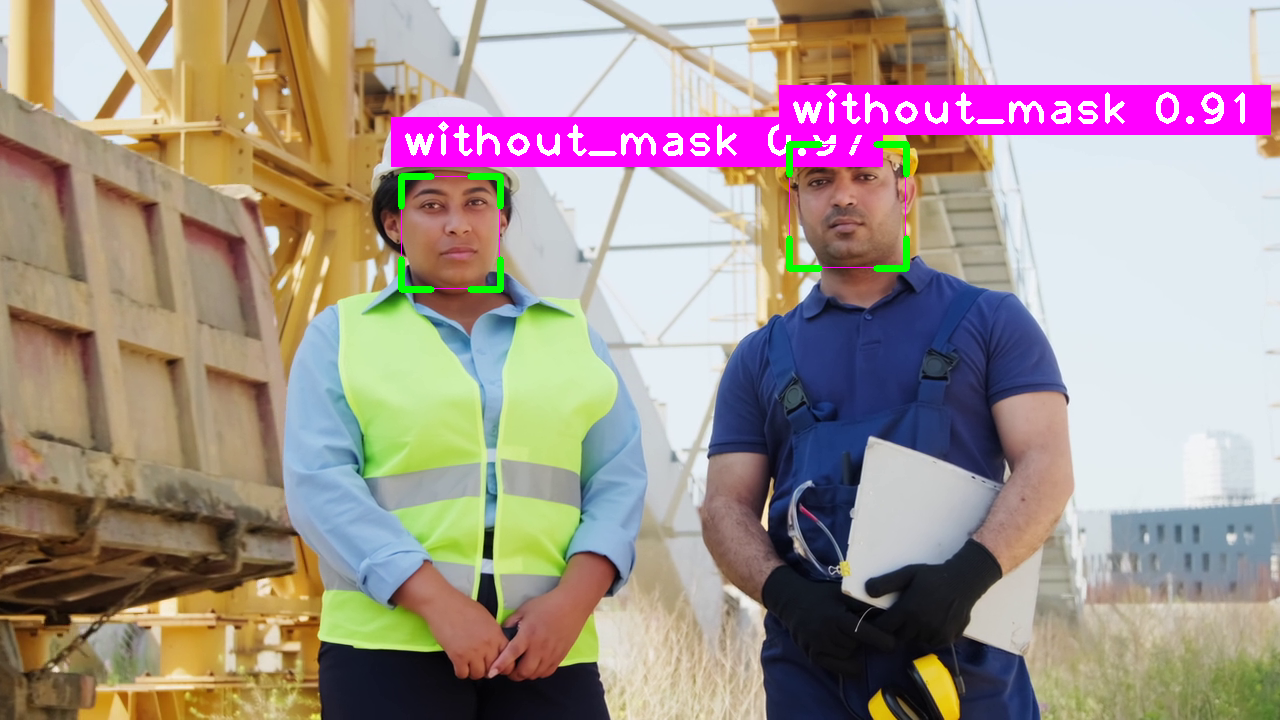


0: 384x640 2 without_masks, 9.5ms
Speed: 2.8ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import time

cap1 = cv2.VideoCapture("/content/ppe-2-1.mp4")
model = YOLO('/content/runs/detect/train3/weights/best.pt')

while True:
    success1, img1 = cap1.read()
    if not success1:
        break

    results = model(img1, stream=True)

    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            w, h = x2 - x1, y2 - y1
            cvzone.cornerRect(img1, (x1, y1, w, h))

            conf = round(float(box.conf[0]), 2)
            cls = int(box.cls[0])

            cvzone.putTextRect(
                img1,
                f'{classNames[cls]} {conf}',
                (max(0, x1), max(30, y1 - 20))
            )

    clear_output(wait=True)
    cv2_imshow(img1)

